# References
## 
* 

# Parameters adjusted

# Considerations
* I added the independent noise input (which acted on the dendritic compartment) on the configuration file. Here I only change some of its parameters.
* Because Renshaw cell effects on motoneurons are inhibitory, I can separate cortical to interneuron input according to their nature. In this case, just using excitatory sinpses will do.
* Right now, I could not obtain the flat input.

In [1]:
import sys
sys.path.insert(0, '../../../..')
import time
from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [2]:
MNQtd = 300
simDuration_ms = 20000
tmin = 1000
Esyn = 70
timeStep_ms = 0.05
t = np.arange(0, simDuration_ms, timeStep_ms)
availableMNs = range(MNQtd)
recordedMN = 1#np.random.choice(availableMNs)
print 'Recorded MN #'+str(recordedMN)

Recorded MN #1


# No Renshaw

<IPython.core.display.Javascript object>


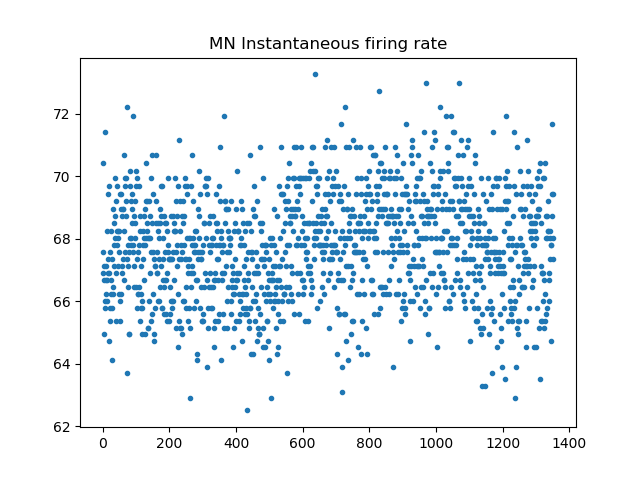

<IPython.core.display.Javascript object>


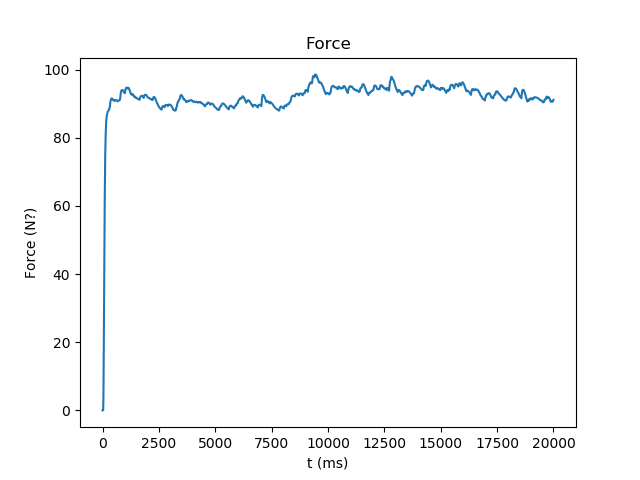

<IPython.core.display.Javascript object>


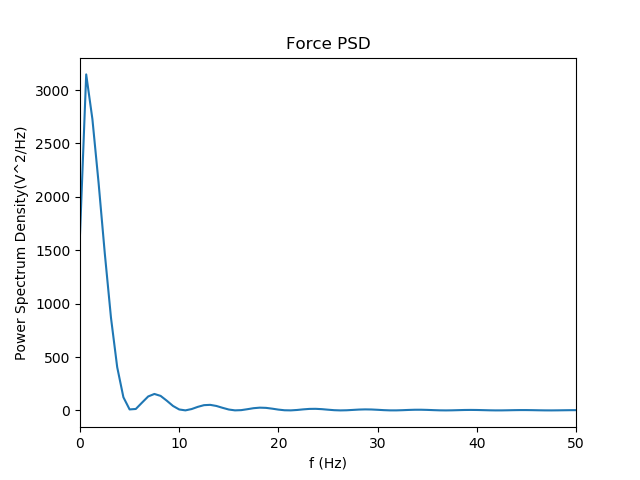

<IPython.core.display.Javascript object>


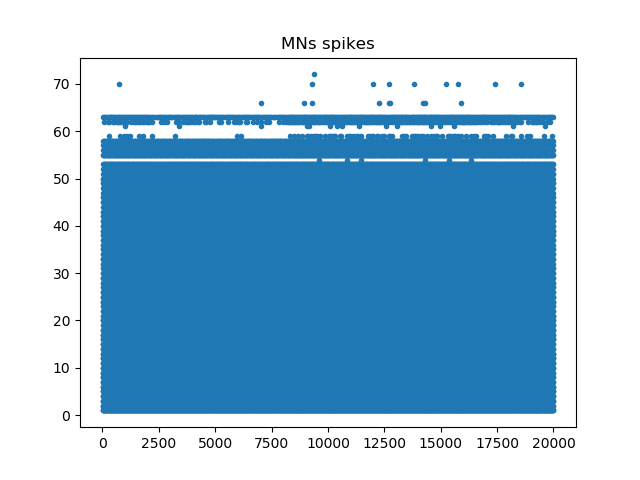

<IPython.core.display.Javascript object>


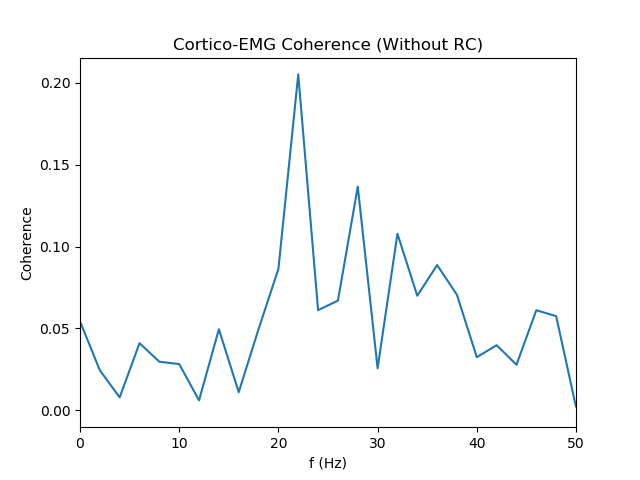

In [4]:
spikeInstant = []
unitNumber = []
force = []
instantaneousFiring = []
g = []
V = []
I = []
nt1 = []
nt2 = []
in1 = []
in2 = []
CDG = []
emg = []

filename = 'datNoRC/MNspk.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    spikeInstant.append(float(line.split()[0]))
    unitNumber.append(int(float(line.split()[1])))
f.close()

filename = 'datNoRC/force.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    force.append(float(line.split()[0]))
f.close()

filename = 'datNoRC/g_emg.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    CDG.append(float(line.split()[0]))
    emg.append(float(line.split()[1]))
f.close()

# filename = 'inputV_I.dat'
# f = open(filename, 'r')
# lines = f.readlines()
# for line in lines:
#     V.append(float(line.split()[0]))
#     I.append(float(line.split()[1]))
# f.close()

# filename = 'NTspk.dat'
# f = open(filename, 'r')
# lines = f.readlines()
# for line in lines:
#     nt1.append(float(line.split()[0]))
#     nt2.append(float(line.split()[1]))
# f.close()

# filename = 'FrequencyAnalysis/INspk.dat'
# f = open(filename, 'r')
# lines = f.readlines()
# for line in lines:
#     in1.append(float(line.split()[0]))
#     in2.append(float(line.split()[1]))
# f.close()

MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedMN]
if not any(MNSpikeInstants):
    print "No spikes for this MN"
elif len(MNSpikeInstants)==1:
    print "Length 1..."
else:
    for i in range(len(MNSpikeInstants)-1):
        instantaneousFiring = np.append(instantaneousFiring, 
           [1000/(MNSpikeInstants[i+1]-MNSpikeInstants[i])])
    plt.figure()
    plt.plot(instantaneousFiring, '.')
    plt.title('MN Instantaneous firing rate')
    plt.show()
    
    fs=1/(timeStep_ms*1e-3)
    
    plt.figure()
    plt.plot(t, force)
    plt.title('Force')
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N?)')
    plt.show()
    
#     `boxcar`, `triang`, `blackman`, `hamming`, `hann`, `bartlett`,
#         `flattop`, `parzen`, `bohman`, `blackmanharris`, `nuttall`,
#         `barthann`, `kaiser` (needs beta), `gaussian` (needs standard
#         deviation), `general_gaussian` (needs power, width), `slepian`
#         (needs width), `dpss` (needs normalized half-bandwidth),
#         `chebwin` (needs attenuation), `exponential` (needs decay scale),
#         `tukey` (needs taper fraction)
    
    staticForce = [y for x,y in enumerate(force) if t[x]>tmin]
    fr = 10
    nperseg = 4*fs/2/fr
    noverlap = None
    nfft = 8*nperseg
    detrend = False#'constant'
    fo, Pxxo = signal.welch(staticForce, fs, ('tukey', 0.1), nperseg, noverlap, nfft, detrend)
    
    plt.figure()
    plt.plot(fo, Pxxo)
    plt.title('Force PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum Density(V^2/Hz)')
#     plt.yscale('log')
    plt.xlim([0, 50])
#     plt.xlim((0, 500))
    plt.show()

plt.figure()
plt.plot(spikeInstant, unitNumber, '.')
plt.title('MNs spikes')
plt.show()

# plt.figure()
# plt.plot(nt1, nt2, '.')
# plt.title('neural tract spikes')
# plt.show()

# plt.figure()
# plt.plot(in1, in2, '.')
# plt.title('interneuron spikes')
# plt.show()

# npi = np.array(I)
# npv = np.array(V)

# plt.figure()
# plt.plot(t, npi)
# plt.title('synaptic current')
# plt.show()

# plt.figure()
# plt.plot(t, npv)
# plt.title('compartment voltage')
# plt.show()

# g = np.array(I)/(np.array(V)-Esyn)
# plt.figure()
# plt.plot(t, g)
# plt.title('conductance as I/V')
# plt.show()

# print "Mean conductance, in module, is "+str(abs(np.mean(g[int(200/0.05):])))

fco, Cxyo = signal.coherence(CDG, np.abs(emg), fs, ('tukey', 0.1), 10000, noverlap=5000)
plt.figure()
plt.plot(fco, Cxyo)
plt.title('Cortico-EMG Coherence (Without RC)')
plt.xlabel('f (Hz)')
plt.ylabel('Coherence')
plt.xlim([0, 50])
plt.show()

# With Renshaw

<IPython.core.display.Javascript object>


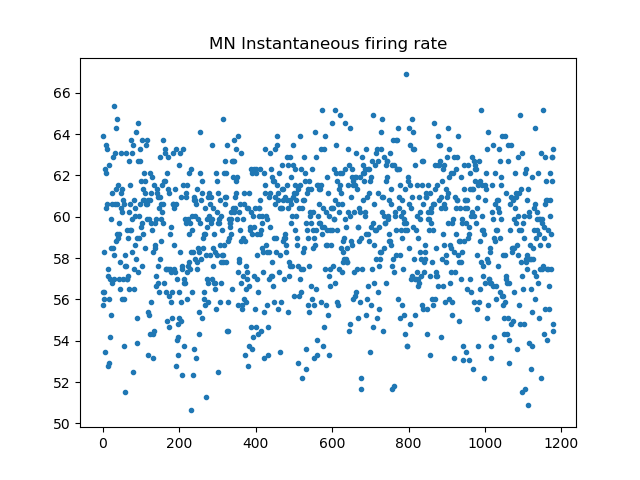

<IPython.core.display.Javascript object>


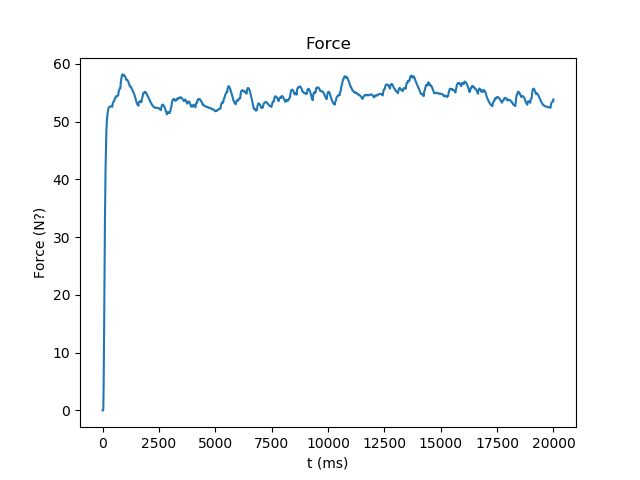

<IPython.core.display.Javascript object>


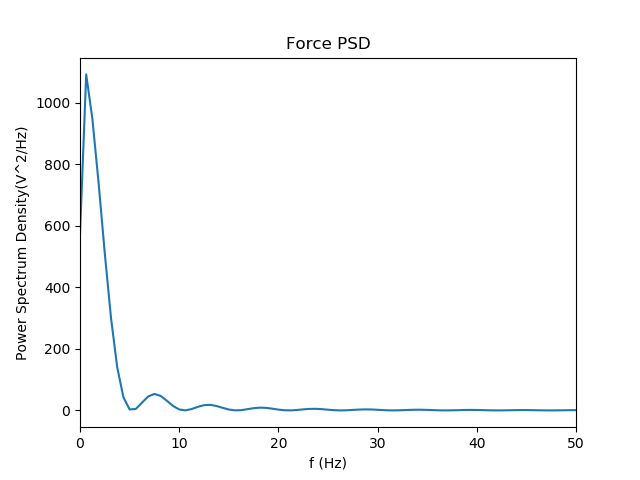

<IPython.core.display.Javascript object>


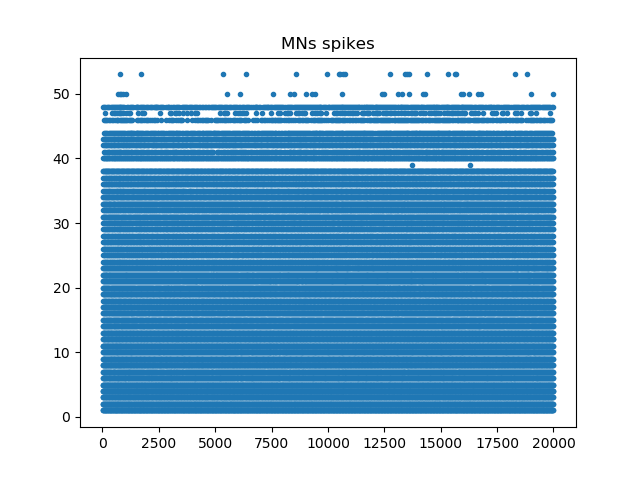

<IPython.core.display.Javascript object>


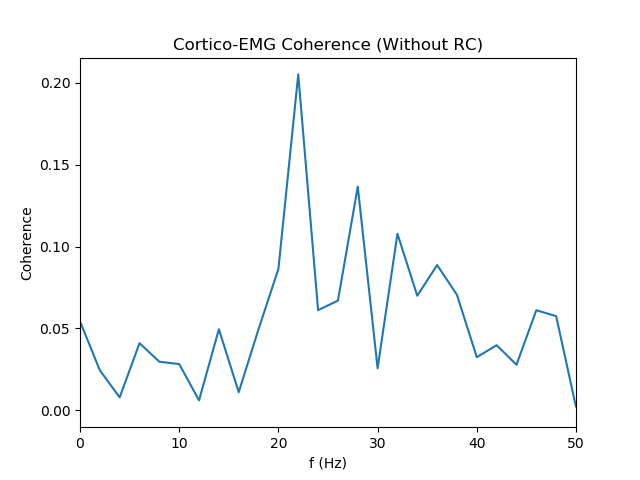

In [5]:
spikeInstant = []
unitNumber = []
force = []
instantaneousFiring = []
g = []
V = []
I = []
nt1 = []
nt2 = []
in1 = []
in2 = []
CDG = []
emg = []

filename = 'MNspk.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    spikeInstant.append(float(line.split()[0]))
    unitNumber.append(int(float(line.split()[1])))
f.close()

filename = 'force.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    force.append(float(line.split()[0]))
f.close()

filename = 'g_emg.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    CDG.append(float(line.split()[0]))
    emg.append(float(line.split()[1]))
f.close()

# filename = 'inputV_I.dat'
# f = open(filename, 'r')
# lines = f.readlines()
# for line in lines:
#     V.append(float(line.split()[0]))
#     I.append(float(line.split()[1]))
# f.close()

# filename = 'NTspk.dat'
# f = open(filename, 'r')
# lines = f.readlines()
# for line in lines:
#     nt1.append(float(line.split()[0]))
#     nt2.append(float(line.split()[1]))
# f.close()

# filename = 'INspk.dat'
# f = open(filename, 'r')
# lines = f.readlines()
# for line in lines:
#     in1.append(float(line.split()[0]))
#     in2.append(float(line.split()[1]))
# f.close()

MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedMN]
if not any(MNSpikeInstants):
    print "No spikes for this MN"
elif len(MNSpikeInstants)==1:
    print "Length 1..."
else:
    for i in range(len(MNSpikeInstants)-1):
        instantaneousFiring = np.append(instantaneousFiring, 
           [1000/(MNSpikeInstants[i+1]-MNSpikeInstants[i])])
    plt.figure()
    plt.plot(instantaneousFiring, '.')
    plt.title('MN Instantaneous firing rate')
    plt.show()
    
    fs=1/(timeStep_ms*1e-3)
    
    plt.figure()
    plt.plot(t, force)
    plt.title('Force')
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N?)')
    plt.show()
    
#     `boxcar`, `triang`, `blackman`, `hamming`, `hann`, `bartlett`,
#         `flattop`, `parzen`, `bohman`, `blackmanharris`, `nuttall`,
#         `barthann`, `kaiser` (needs beta), `gaussian` (needs standard
#         deviation), `general_gaussian` (needs power, width), `slepian`
#         (needs width), `dpss` (needs normalized half-bandwidth),
#         `chebwin` (needs attenuation), `exponential` (needs decay scale),
#         `tukey` (needs taper fraction)
    
    staticForce = [y for x,y in enumerate(force) if t[x]>tmin]
    fr = 10
    nperseg = 4*fs/2/fr
    noverlap = None
    nfft = 8*nperseg
    detrend = False#'constant'
    fc, Pxxc = signal.welch(staticForce, fs, ('tukey', 0.1), nperseg, noverlap, nfft, detrend)
    
    plt.figure()
    plt.plot(fc, Pxxc)
    plt.title('Force PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum Density(V^2/Hz)')
#     plt.yscale('log')
    plt.xlim([0, 50])
#     plt.xlim((0, 500))
    plt.show()

plt.figure()
plt.plot(spikeInstant, unitNumber, '.')
plt.title('MNs spikes')
plt.show()

# plt.figure()
# plt.plot(nt1, nt2, '.')
# plt.title('neural tract spikes')
# plt.show()

# plt.figure()
# plt.plot(in1, in2, '.')
# plt.title('interneuron spikes')
# plt.show()

# npi = np.array(I)
# npv = np.array(V)

# plt.figure()
# plt.plot(t, npi)
# plt.title('synaptic current')
# plt.show()

# plt.figure()
# plt.plot(t, npv)
# plt.title('compartment voltage')
# plt.show()

# g = np.array(I)/(np.array(V)-Esyn)
# plt.figure()
# plt.plot(t, g)
# plt.title('conductance as I/V')
# plt.show()

# print "Mean conductance, in module, is "+str(abs(np.mean(g[int(200/0.05):])))

fcc, Cxyc = signal.coherence(CDG, np.abs(emg), fs, ('tukey', 0.1), 10000, noverlap=5000)
plt.figure()
plt.plot(fco, Cxyo)
plt.title('Cortico-EMG Coherence (Without RC)')
plt.xlabel('f (Hz)')
plt.ylabel('Coherence')
plt.xlim([0, 50])
plt.show()

<IPython.core.display.Javascript object>


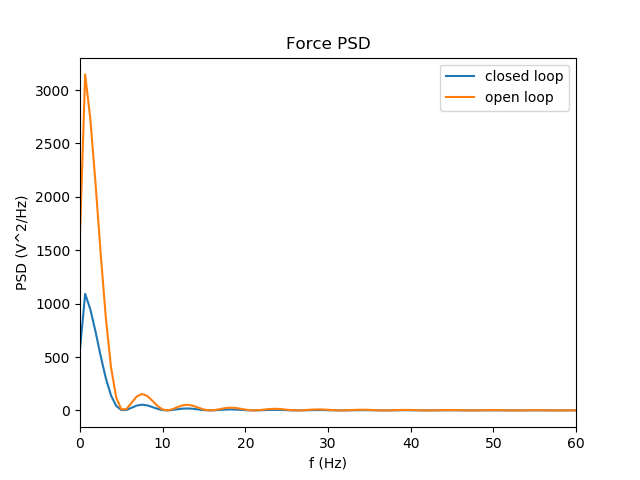

<IPython.core.display.Javascript object>


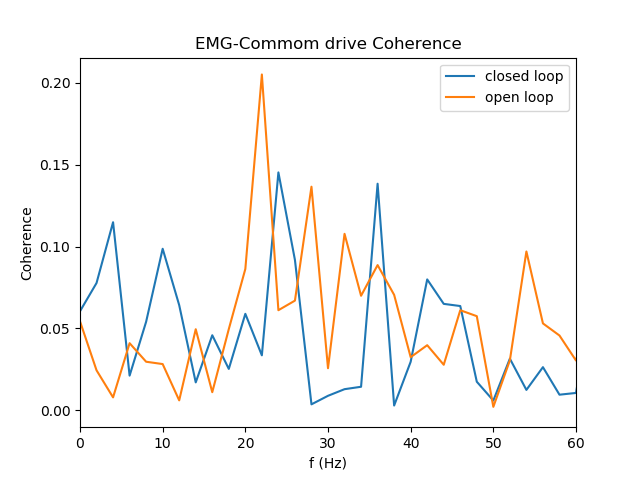

In [6]:
plt.figure()
plt.title('Force PSD')
plt.xlabel('f (Hz)')
plt.ylabel('PSD (V^2/Hz)')
plt.plot(fc, Pxxc, label='closed loop')
plt.plot(fo, Pxxo, label='open loop')
plt.legend()
plt.xlim([0, 60])
plt.show()

plt.figure()
plt.title('EMG-Commom drive Coherence')
plt.xlabel('f (Hz)')
plt.ylabel('Coherence')
plt.plot(fcc, Cxyc, label='closed loop')
plt.plot(fco, Cxyo, label='open loop')
plt.legend()
plt.xlim([0, 60])
plt.show()